In [3]:
import tensorflow_hub as tfhub
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models,layers
from tensorflow.keras.models import load_model, save_model


In [3]:

vgg = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

print(vgg)

In [11]:
vgg = tfhub.KerasLayer(vgg ,input_shape = (224,224,3) , trainable = False)
print(vgg)

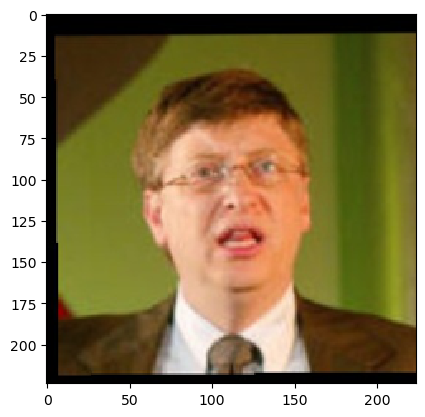

In [9]:
import numpy as np
from PIL import Image
from numpy import asarray


from matplotlib import pyplot as plt

target_y = {}



# import required module
import os
# assign directory
d=[]
y = []
# iterate over files in
# that directory
ina = -1
imgs = []
for f_n in os.listdir('data'):
    f_p = os.path.join('data',f_n)
    target_y[ina] = f_n
    ina = ina +1
    for filename in os.listdir(f_p):
        f = os.path.join(f_p, filename)

        if os.path.isfile(f):

            img = Image.open(f)

            img = img.resize((224,224))
            ni = np.array(img)
            imgs.append(ni)
            y.append(ina)

plt.imshow(imgs[0], interpolation='nearest')
plt.show()


In [4]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
     layer.trainable = False



cnn = models.Sequential([

    base_model,
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(ina+1, activation='softmax')
])


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The current working directory is: C:\Users\harsh\Desktop\Code_Files\Python\Face_Rec


In [12]:
import numpy as np
x = np.array(imgs)

x = np.array(x).reshape(-1, 224, 224, 3)
x = x/224
y = np.array(y)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [5]:
cnn.fit(x,y,epochs=10)

Epoch 1/10
2/2 [==============================] - 5s 271ms/step - loss: 1.2186 - accuracy: 0.3824
Epoch 2/10
2/2 [==============================] - 3s 272ms/step - loss: 3.1181 - accuracy: 0.3824
Epoch 3/10
2/2 [==============================] - 4s 286ms/step - loss: 2.9212 - accuracy: 0.4118
Epoch 4/10
2/2 [==============================] - 4s 285ms/step - loss: 2.2381 - accuracy: 0.6176
Epoch 5/10
2/2 [==============================] - 3s 236ms/step - loss: 2.3426 - accuracy: 0.7059
Epoch 6/10
2/2 [==============================] - 4s 311ms/step - loss: 1.8547 - accuracy: 0.5882
Epoch 7/10
2/2 [==============================] - 4s 259ms/step - loss: 3.9427 - accuracy: 0.5000
Epoch 8/10
2/2 [==============================] - 4s 249ms/step - loss: 1.7356 - accuracy: 0.6765
Epoch 9/10
2/2 [==============================] - 4s 305ms/step - loss: 2.0892 - accuracy: 0.5588
Epoch 10/10
2/2 [==============================] - 4s 325ms/step - loss: 2.0986 - accuracy: 0.5294


In [19]:
print(ina)

1


In [6]:
cnn.save('face_model.h5')
#save_model(cnn, 'test3.h5')

In [15]:
import os

current_directory = os.getcwd()

print("The current working directory is:", current_directory)

m1=tf.keras.models.load_model("test1.h5")



m1.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

The current working directory is: C:\Users\harsh\Desktop\Code_Files\Python\Face_Rec


In [16]:
m1.fit(x,y,10)

5/5 [==============================] - 14s 2s/step - loss: 1.2215 - accuracy: 0.3902


In [17]:
img = Image.open('test_GB.jpg')
img = img.resize((224,224))
im = np.array([img])
im
print(target_y)
ans = cnn.predict(im)
ind = np.argmax(ans)
target_y[ind-1]

{-1: '1_BG', 0: '2_GB', 1: '3_ben'}
1/1 [==============================] - 1s 1s/step


'3_ben'

In [10]:
m1.fit(x,y,epochs=10)

Epoch 1/10
2/2 [==============================] - 5s 332ms/step - loss: 0.6703 - accuracy: 0.6471
Epoch 2/10
2/2 [==============================] - 3s 308ms/step - loss: 0.6751 - accuracy: 0.6471
Epoch 3/10
2/2 [==============================] - 3s 306ms/step - loss: 0.6572 - accuracy: 0.6765
Epoch 4/10
2/2 [==============================] - 3s 256ms/step - loss: 0.6654 - accuracy: 0.5882
Epoch 5/10
2/2 [==============================] - 4s 291ms/step - loss: 0.6701 - accuracy: 0.6176
Epoch 6/10
2/2 [==============================] - 4s 254ms/step - loss: 0.6623 - accuracy: 0.7059
Epoch 7/10
2/2 [==============================] - 4s 312ms/step - loss: 0.6562 - accuracy: 0.6471
Epoch 8/10
2/2 [==============================] - 4s 314ms/step - loss: 0.6678 - accuracy: 0.6176
Epoch 9/10
2/2 [==============================] - 5s 603ms/step - loss: 0.6555 - accuracy: 0.6471
Epoch 10/10
2/2 [==============================] - 5s 310ms/step - loss: 0.6528 - accuracy: 0.6765


In [18]:
img = Image.open('test_GB.jpg')
img = img.resize((224,224))
im = np.array([img])
im
print(target_y)
ans = m1.predict(im)
ind = np.argmax(ans)
target_y[ind-1]

{-1: 'B_G', 0: 'G_B'}
1/1 [==============================] - 0s 399ms/step


'G_B'

In [12]:
import os

current_directory = os.getcwd()

print("The current working directory is:", current_directory)

m2=tf.keras.models.load_model("test1.h5")

m2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The current working directory is: C:\Users\harsh\Desktop\Code_Files\Python\Face_Rec


In [13]:
img = Image.open('test_GB.jpg')
img = img.resize((224,224))
im = np.array([img])
im
print(target_y)
ans = m2.predict(im)
ind = np.argmax(ans)
target_y[ind-1]

{-1: 'B_G', 0: 'G_B'}
1/1 [==============================] - 0s 408ms/step


'G_B'

In [13]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
import pygame
import os

pygame.init()
def open_folder_dialog():
    folder_path = filedialog.askdirectory()
    if folder_path:
        print("Selected folder:", folder_path)

        checkFiles(folder_path)

background_image = pygame.image.load("face.jpeg")
image_size = background_image.get_rect().size
width, height = image_size

display = pygame.display.set_mode((width+50,height))
pygame.display.set_caption("Face Recognition")

def showButtonRecognize(on):
    font = pygame.font.SysFont("monospace", 17,2,False)
    if not on:
        text = font.render('Recognation', 15, (0, 0, 0))
        pygame.draw.rect(display,(255,255,255),(610,325,120,30))
        pygame.draw.rect(display,(200,200,200),(610,325,120,30),1)
    else:
        text = font.render('Recognation', 15, (255,255,255))
        pygame.draw.rect(display,(200,200,200),(610,325,120,30))
        pygame.draw.rect(display,(0,0,0),(610,325,120,30),1)
    display.blit(text,(615,330))


def showImage(path):
    if (path!=""):
        image = pygame.image.load(path)
        image = pygame.transform.scale(image,(150,150))
        display.blit(image,(610,100))
        
    

    
def select_file():
    file_path = filedialog.askopenfilename(filetypes=[("All files", "*.*")])
    if file_path:
        return file_path

def checkFiles(filename):
    files = os.listdir(filename)
    files = [os.path.join(filename,i) for i in files ]
    print(files)
    ina = len(files)

def showButtonSelect(on):
    font = pygame.font.SysFont("monospace", 17,2,False)
    if not on:
        text = font.render('Select Image', 15, (0, 0, 0))
        pygame.draw.rect(display,(255,255,255),(610,280,140,30))
        pygame.draw.rect(display,(200,200,200),(610,280,140,30),1)
    else:
        text = font.render('SelectImage', 15, (255,255,255))
        pygame.draw.rect(display,(200,200,200),(610,280,140,30))
        pygame.draw.rect(display,(0,0,0),(610,280,140,30),1)
    display.blit(text,(615,285))
def showButtonTrain(on):
    font = pygame.font.SysFont("monospace", 17,2,False)
    if not on:
        text = font.render('Train', 15, (0, 0, 0))
        pygame.draw.rect(display,(255,255,255),(610,360,120,30))
        pygame.draw.rect(display,(200,200,200),(610,360,120,30),1)
    else:
        text = font.render('Train', 15, (255,255,255))
        pygame.draw.rect(display,(200,200,200),(610,360,120,30))
        pygame.draw.rect(display,(0,0,0),(610,360,120,30),1)
    display.blit(text,(615,365))
    
    
def trainYourModeal():
    if ina>0:
        print("done")
    else :
        print("not")

def main():
    run = True
    path = ""

    while run:
        display.fill((255,255,255))
        display.blit(background_image, (0, 0))
        x,y = pygame.mouse.get_pos()
        for event in pygame.event.get():
            if event.type == pygame.QUIT or (event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE):
                run = False
            if event.type ==pygame.MOUSEBUTTONDOWN:
                if(610<x<730 and 280<y<310):
                    path = select_file()
                    
                if(610<x<730 and 360<y<390):
                    open_folder_dialog()
                    trainYourModeal()
        showButtonSelect(610<x<730 and 280<y<310)        
        showButtonRecognize(610<x<730 and 325<y<355)
        showButtonTrain(610<x<730 and 360<y<390)
        showImage(path)
        pygame.display.update()
    pygame.quit()
main()



Selected folder: C:/Users/harsh/Desktop/Code_Files/Python/Face_Rec/data/1_yug
[]
done


In [ ]:
# !pip install pygame

In [ ]:
import tkinter as tk
from datetime import datetime
from tkinter import ttk
from tkinter import filedialog
import pygame
import os
import numpy as np
from PIL import Image
from numpy import asarray
import tensorflow_hub as tfhub
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models,layers
from tensorflow.keras.models import load_model, save_model


pygame.init()
def open_folder_dialog():
    folder_path = filedialog.askdirectory()
    if folder_path:
        print("Selected folder:", folder_path)
        return folder_path
       

background_image = pygame.image.load("face.jpeg")
image_size = background_image.get_rect().size
width, height = image_size
display = pygame.display.set_mode((width+50,height))
pygame.display.set_caption("Face Recognition")


def train_model(folder,n):
    
    print(folder)
    folder_name = os.path.basename('data')
    
    
    data = []
    y = []
    for f_n in os.listdir('data'):
        print(f_n)
        x, name = f_n.split('_')
        print(f"value of total folders are  :- {x}")
        f_p = os.path.join('data',f_n)
        for filename in os.listdir(f_p):
            f = os.path.join(f_p, filename)
            if os.path.isfile(f):

                img = Image.open(f)

                img = img.resize((224,224))
                rx = np.array(img)/224 # Normalization
                data.append(rx)
                y.append(int(x)-1)
    print(f"value of data in = {len(data)} |nvalue of y in {len(y)}")
    data = np.array(data)
    y = np.array(y)
    data = np.array(data).reshape(-1, 224, 224, 3)
    print(data.shape)
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
         layer.trainable = False



    m2 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),  
    layers.Dense(n, activation='softmax')
    ])


    m2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    #m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    #m2.layers.pop()
    #m2.add(tf.keras.layers.Dense(n, activation='softmax'))
    m2.fit(data,y,epochs=20)
    os.remove("face_model.h5")
    m2.save('face_model.h5')
    return m2




def showButtonRecognize(on):
    font = pygame.font.SysFont("monospace", 17,2,False)
    if not on:
        text = font.render('Recognation', 15, (0, 0, 0))
        pygame.draw.rect(display,(255,255,255),(610,325,120,30))
        pygame.draw.rect(display,(200,200,200),(610,325,120,30),1)
    else:
        text = font.render('Recognation', 15, (255,255,255))
        pygame.draw.rect(display,(200,200,200),(610,325,120,30))
        pygame.draw.rect(display,(0,0,0),(610,325,120,30),1)
    display.blit(text,(615,330))


def showImage(path):
    if (path!=""):
        image = pygame.image.load(path)
        image = pygame.transform.scale(image,(150,150))
        display.blit(image,(610,100))
        
    

    
def select_file():
    file_path = filedialog.askopenfilename(filetypes=[("All files", "*.*")])
    fi_path = file_path
    if file_path:
        return file_path

    
def showButtonSelect(on):
    font = pygame.font.SysFont("monospace", 17,2,False)
    if not on:
        text = font.render('Select Image', 15, (0, 0, 0))
        pygame.draw.rect(display,(255,255,255),(610,280,140,30))
        pygame.draw.rect(display,(200,200,200),(610,280,140,30),1)
    else:
        text = font.render('SelectImage', 15, (255,255,255))
        pygame.draw.rect(display,(200,200,200),(610,280,140,30))
        pygame.draw.rect(display,(0,0,0),(610,280,140,30),1)
    display.blit(text,(615,285))
    
    
def showButtonTrain(on):
    font = pygame.font.SysFont("monospace", 17,2,False)
    if not on:
        text = font.render('Train', 15, (0, 0, 0))
        pygame.draw.rect(display,(255,255,255),(610,360,120,30))
        pygame.draw.rect(display,(200,200,200),(610,360,120,30),1)
    else:
        text = font.render('Train', 15, (255,255,255))
        pygame.draw.rect(display,(200,200,200),(610,360,120,30))
        pygame.draw.rect(display,(0,0,0),(610,360,120,30),1)
        
    display.blit(text,(615,365))
    
    
def  process_model(file_path,model,name):
    print(f"U have clicked recognize button successfully \n Your file path is : {file_path}")
    file = os.path.join(file_path)
    if os.path.isfile(file):
        img = Image.open(file)
        img = img.resize((224,224))
        x = np.array(img)/224
        ix = np.array([x])
        ans = model.predict(ix)
        ind = np.argmax(ans)
        print(name[str(ind+1)])
        return name[str(ind+1)]

    
def showName(name,show):
    font = pygame.font.SysFont("monospace", 17,2,False)
    if (name!=""):
            text = font.render(name, 15, (0,0,0))
    else:
        name = ""
    if show:
        display.blit(text,(610,75))

def main():
                         
    
    name_dic = {}
    folders = os.listdir("C:/Users/harsh/Desktop/Code_Files/Python/Face_Rec/data")
    #files = [os.path.join("C:/Users/harsh/Desktop/Code_Files/Python/Face_Rec/data",i) for i in files ]
    for f in folders:
        n, name = f.split('_')       
        name_dic[n] = name
    print(folders)
    print(name_dic)
    print(f"no of folders in data are : == {len(folders)}")
    ina = len(folders)
    print(f"valu f initial ina is :==-=- {ina}")
    run = True
    path = ""
    name =""
    show = False

    while run:
        display.fill((255,255,255))
        display.blit(background_image, (0, 0))
        x,y = pygame.mouse.get_pos()
        for event in pygame.event.get():
            if event.type == pygame.QUIT or (event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE):
                run = False
            if event.type ==pygame.MOUSEBUTTONDOWN:
                if(610<x<730 and 280<y<310):
                    path = select_file()
                    
                    
                if(610<x<730 and 360<y<390):
                    folder = open_folder_dialog() # folder_path
                    model = train_model(folder,ina)
                    
                if(610<x<730 and 325<y<355):
                    m2=tf.keras.models.load_model("face_model.h5")
                    m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    if(m2):
                        name = process_model(path,m2,name_dic)
                        show= True
                    
        showButtonSelect(610<x<730 and 280<y<310)        
        showButtonRecognize(610<x<730 and 325<y<355)
        showButtonTrain(610<x<730 and 360<y<390)
        showImage(path)
        showName(name,show)
        pygame.display.update()
    pygame.quit()
main()



['1_BG', '2_ben', '3_akashayKumar']
{'1': 'BG', '2': 'ben', '3': 'akashayKumar'}
no of folders in data are : == 3
valu f initial ina is :==-=- 3
Selected folder: C:/Users/harsh/Desktop/Code_Files/Python/Face_Rec/data
C:/Users/harsh/Desktop/Code_Files/Python/Face_Rec/data
1_BG
value of total folders are  :- 1
2_ben
value of total folders are  :- 2
3_akashayKumar
value of total folders are  :- 3
value of data in = 31 |nvalue of y in 31
(31, 224, 224, 3)
Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 1.3820 - accuracy: 0.2903
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 2.0044 - accuracy: 0.4839
Epoch 3/20
1/1 [==============================] - 5s 5s/step - loss: 1.5583 - accuracy: 0.5484
Epoch 4/20
1/1 [==============================] - 4s 4s/step - loss: 0.9986 - accuracy: 0.7097
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 0.9160 - accuracy: 0.6774
Epoch 6/20
1/1 [==============================] - 4s 4s/step - loss: 